# Modelo supervisado regresión Lineal

Platzi - Curso de Fundamentos Prácticos de Machine Learning

Por: David Alonso Rueda Rodríguez - daruedar@correo.udistrital.edu.co

Tema: Modelo supervisado regresión Lineal.

## Objetivo de la actividad:

Aplicar el modelo supervisado regresión lineal a 2 grupos de datos

## Temas trabajados

A continuación, listado de actividades trabajadas:
    
### Situación Problémica 01

    1. Describir el problema
    2. Describir los datos cargados utilizados
    3. Aplicar algoritmo
    4. Analizar
  
#### Fuente de repositorio de datos:

[Datos suministrados en el curso](../src/salarios.csv)

#### Librerías requeridas:

[Pandas](https://pandas.pydata.org/) - [Matplotlib](https://matplotlib.org/) - [Scikit-learn](https://scikit-learn.org/stable/)

#### Listado de versiones

- 000 Se agrega partición de los datos de entrenamiento, se entrena al modelo y se evalua el rendimiento, se agrega matriz para evaluar correlación de los datos cargados.

- 01 Descripción inicial de los datos, y del problema a desarollar


## 1. Describir el problema

Se desea predecir el salario de un programador utilizando como variable independiente la experiencia de la persona.

## 2. Describir los datos cargados utilizados

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
datos = pd.read_csv("../src/salarios.csv")
datos.head()

,Aexperiencia,Salario
0,10.0,42500
1,8.0,36302
2,5.4,35000
3,2.5,18103
4,1.0,15000


In [3]:
print("- Cantidad de muestras:{0} \n- Cantidad de características:{1}" .format(datos.shape[0], datos.shape[1]))

- Cantidad de muestras:30 
- Cantidad de características:2


Los datos suministrados tienen un total de 30 ejemplos y 2 características que describen:

- Aexperiencia = dato de experiencia en años de un programador
- Salario = dato del salario anual expresado en unidades monetarias

#### Descripción de los datos cargados

In [4]:
datos.describe()

,Aexperiencia,Salario
count,30.000000,30.000000
mean,4.870000,27107.100000
std,2.899721,9458.745839
min,1.000000,15000.000000
25%,2.625000,18300.500000
50%,4.000000,26650.000000
75%,6.750000,35201.000000
max,10.000000,42500.000000


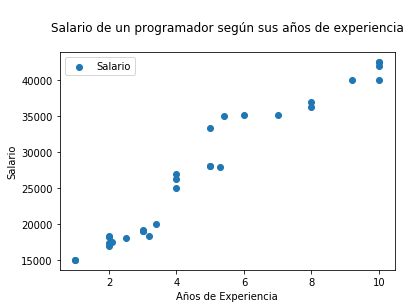

In [46]:
plt.scatter(datos['Aexperiencia'], datos['Salario'])

plt.title("\nSalario de un programador según sus años de experiencia\n")
plt.xlabel("Años de Experiencia")
plt.ylabel("Salario")
plt.legend()

La matriz de correlación muestra que los datos presentan una correlación positiva.

In [6]:
datos.corr()

,Aexperiencia,Salario
Aexperiencia,1.000000,0.968738
Salario,0.968738,1.000000


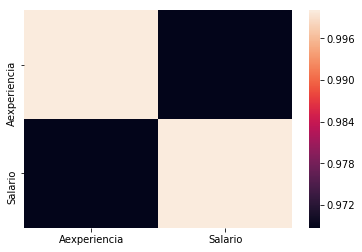

In [7]:
sns.heatmap(datos.corr()) 

## 2. Aplicar algoritmo

In [68]:
# Importar librerías de Scikit Learn para aplicar machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


### 2.1 Separación de datos para entrenamiento

In [60]:
# Se envia el 70% de los datos para realizar el entrenamiento del modelo
x = datos.iloc[:,:-1].values
y = datos.iloc[:,:1].values
X_train, X_test, Y_train, Y_test = train_test_split (x, y, test_size = 0.3, random_state=0)

In [69]:
# Se envia el 70% de los datos para realizar el entrenamiento del modelo
x2 = datos['Aexperiencia'].values.reshape(-1,1)
y2 = datos['Salario'].values.reshape(-1,1)
X_train2, X_test2, Y_train2, Y_test2 = train_test_split (x2, y2, test_size = 0.3)

### 2.2 Entrenamiento de modelos

In [70]:
# Inicialización de los modelos
modelo_lineal = LinearRegression()
modelo_lineal2 = LinearRegression()

In [62]:
# Entrenamiento del modelo con llamado de variables iniciales
modelo_lineal.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [71]:
# Entrenamiento del modelo con otra forma de llamado
modelo_lineal2.fit(X_train2, Y_train2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

## 2.3 Visualización de Resultados

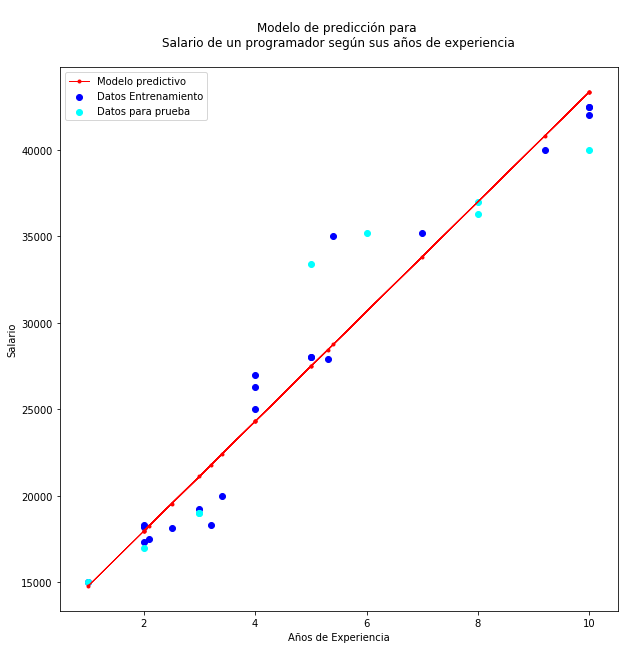

In [120]:
grafico1 = plt.figure(figsize=(10,10))
plt.plot(X_train2, modelo_lineal2.predict(X_train2), 'r.-', linewidth=1, label="Modelo predictivo")
plt.scatter(X_train2, Y_train2, color = 'blue', label="Datos Entrenamiento")
plt.scatter(X_test2, Y_test2, color = 'cyan', label="Datos para prueba")


plt.title("\nModelo de predicción para \nSalario de un programador según sus años de experiencia\n")
plt.xlabel("Años de Experiencia")
plt.ylabel("Salario")
plt.legend()
plt.show()

## 2.4. Evaluación del modelo

In [122]:
modelo_lineal2.score(X_test2, Y_test2)

0.90622312583663722